In [1]:
import os

In [2]:
import fitsio
import numpy as np
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import lib

In [4]:
lib.plotting.setup()

In [5]:
twocolumn_kwargs = {
    "width": 1 + 6/8,
    "height": 2,
    "horizontal_margin": 8/12 + 1/12,
    "vertical_margin": 6/12,
    "gutter": 1/8,
    "fig_width": 7,
    "fig_height": 3,
}

In [6]:
with fitsio.FITS("/global/cfs/projectdirs/des/atong/y6kp-shear/starsim/catalogs/gaia_y6.fits") as fits:
    gaia_y6 = fits[1].read()

In [7]:
with fitsio.FITS("/global/cfs/projectdirs/des/atong/y6kp-shear/starsim/catalogs/lsst_y6.fits") as fits:
    lsst_y6 = fits[1].read()

In [8]:
with fitsio.FITS("/global/cfs/projectdirs/des/atong/y6kp-shear/starsim/catalogs/merged_y6.fits") as fits:
    merged_y6 = fits[1].read()

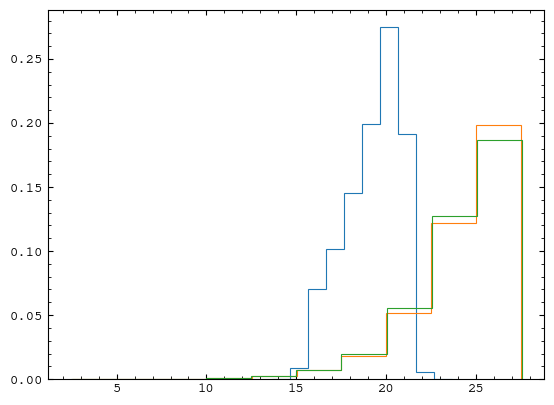

In [9]:
plt.hist(
    gaia_y6["mag_auto_r"],
    histtype="step",
    density=True,
)
plt.hist(
    lsst_y6["rmag"],
    histtype="step",
    density=True,
)
plt.hist(
    lsst_y6["des_rmag"],
    histtype="step",
    density=True,
)
plt.show()

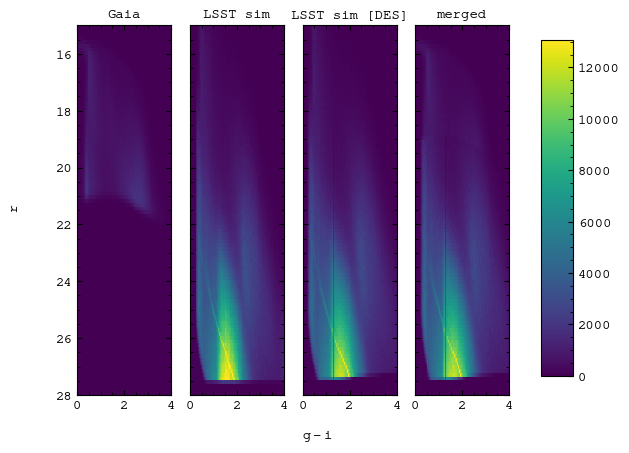

In [10]:
NBINS = 100
bins=[
    np.linspace(0, 4, NBINS + 1),
    np.linspace(15, 28, NBINS + 1),
]

norm = mpl.colors.Normalize()

fig, axs = plt.subplots(1, 4, sharex=True, sharey=True)

axs[3].hist2d(
    merged_y6["gi_color"],
    merged_y6["rmag"],
    bins=bins,
    norm=norm,
    cmap="viridis",
)
axs[3].set_title("merged")
axs[3].invert_yaxis()

axs[0].hist2d(
    gaia_y6["gi_color"],
    gaia_y6["mag_auto_r"],
    bins=bins,
    norm=norm,
    cmap="viridis",
)
axs[0].set_title("Gaia")
axs[0].invert_yaxis()

axs[1].hist2d(
    lsst_y6["gi_color"],
    lsst_y6["rmag"],
    bins=bins,
    norm=norm,
    cmap="viridis",
)
axs[1].set_title("LSST sim")
axs[1].invert_yaxis()

axs[2].hist2d(
    lsst_y6["des_gi_color"],
    lsst_y6["des_rmag"],
    bins=bins,
    norm=norm,
    cmap="viridis",
)
axs[2].set_title("LSST sim [DES]")
axs[2].invert_yaxis()

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap="viridis"), cax=cbar_ax)

fig.supxlabel("$g - i$")
fig.supylabel("$r$")

plt.show()

In [11]:
NBINS = 100
bins=[
    np.linspace(0, 4, NBINS + 1),
    np.linspace(15, 28, NBINS + 1),
]

In [13]:
gaia_hist, _, _ = np.histogram2d(
    gaia_y6["gi_color"],
    gaia_y6["mag_auto_r"],
    bins=bins,
)

In [14]:
lsst_hist, _, _ = np.histogram2d(
    lsst_y6["des_gi_color"],
    lsst_y6["des_rmag"],
    bins=bins,
)

In [15]:
merged_hist, _, _ = np.histogram2d(
    merged_y6["gi_color"],
    merged_y6["rmag"],
    bins=bins,
)

In [16]:
# mpl.rcParams["font.monospace"] = ["APL385 Unicode"]
mpl.rcParams["font.monospace"] = ["Nimbus Mono"]

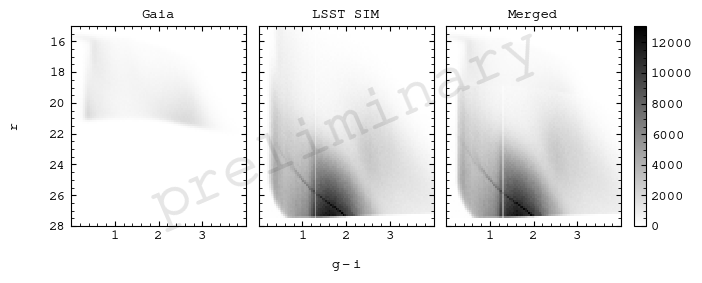

In [50]:
norm = mpl.colors.Normalize()

fig, axs = lib.plotting.make_axes(
    1, 3,
    **twocolumn_kwargs,
)

axs[2].pcolormesh(
    bins[0],
    bins[1],
    merged_hist.T,
    norm=norm,
    rasterized=True,
)
axs[2].set_title("Merged")
axs[2].invert_yaxis()
axs[2].set_xticks([1, 2, 3])
axs[2].set_yticklabels([])

axs[0].pcolormesh(
    bins[0],
    bins[1],
    gaia_hist.T,
    norm=norm,
    rasterized=True,
)
axs[0].set_title("Gaia")
axs[0].invert_yaxis()
axs[0].set_xticks([1, 2, 3])

axs[1].pcolormesh(
    bins[0],
    bins[1],
    lsst_hist.T,
    norm=norm,
    rasterized=True,
)
axs[1].set_title("LSST SIM")
axs[1].invert_yaxis()
axs[1].set_xticks([1, 2, 3])
axs[1].set_yticklabels([])

lib.plotting.add_colorbar(axs[2], mpl.cm.ScalarMappable(norm=norm))

fig.supxlabel("$g - i$")
fig.supylabel("$r$")

lib.plotting.watermark(fig)

fig.savefig("star_colors.pdf")

plt.show()

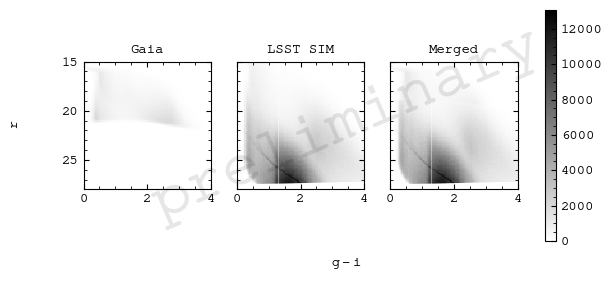

In [49]:
norm = mpl.colors.Normalize()

# fig = plt.figure(figsize=(7, 3))
# spec = fig.add_gridspec(ncols=3, nrows=1)
# axs = {}

# axs[0] = fig.add_subplot(spec[0])
# axs[1] = fig.add_subplot(spec[1], sharex=axs[0], sharey=axs[0])
# axs[2] = fig.add_subplot(spec[2], sharex=axs[0], sharey=axs[0])
fig, axs = plt.subplots(1, 3, figsize=(7, 3), sharex=True, sharey=True)


axs[2].pcolormesh(
    bins[0],
    bins[1],
    merged_hist.T,
    norm=norm,
    rasterized=True,
)
axs[2].set_title("Merged")
axs[2].label_outer()
axs[2].set_box_aspect(1)
axs[2].invert_yaxis()

axs[0].pcolormesh(
    bins[0],
    bins[1],
    gaia_hist.T,
    norm=norm,
    rasterized=True,
)
axs[0].set_title("Gaia")
axs[0].label_outer()
axs[0].set_box_aspect(1)
# axs[0].invert_yaxis()

axs[1].pcolormesh(
    bins[0],
    bins[1],
    lsst_hist.T,
    norm=norm,
    rasterized=True,
)
axs[1].set_title("LSST SIM")
axs[1].label_outer()
axs[1].set_box_aspect(1)
# axs[1].invert_yaxis()

fig.colorbar(mpl.cm.ScalarMappable(norm=norm), ax=axs[:])

fig.supxlabel("$g - i$")
fig.supylabel("$r$")

lib.plotting.watermark(fig)

fig.savefig("star_colors.pdf")

plt.show()